In [2]:
import pandas as pd
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#paths

data= r"C:\Users\admin\python\Horse Race Prediction"

In [3]:
#loading forward data

forward = pd.read_csv("forward.csv")

In [4]:
#load and combine horses and race dataset

#horse_race_data=[]

for year in range(1990,2021):
    horse_file=os.path.join(data,f"horses_{year}.csv")
    race_file=os.path.join(data,f"races_{year}.csv")

    if os.path.exists(horse_file) and os.path.exists(race_file):
        horses =pd.read_csv(horse_file)
        races =pd.read_csv(race_file)

#          #merge horses and races datasets on 'rid'
#         combined_data = pd.merge(horses, races, on="rid", how="inner")
#         horse_race_data.append(combined_data)

# #combine into a single DataFrame
# df = pd.concat(horse_race_data, ignore_index=True)

 #save dataset into csv
# horses.to_csv("horses.csv",index=False)
# races.to_csv("races.csv",index=False)
# print("saved successfully")

C:\Users\admin\AppData\Local\Temp\ipykernel_12272\1785020627.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  horses =pd.read_csv(horse_file)
C:\Users\admin\AppData\Local\Temp\ipykernel_12272\1785020627.py:10: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  horses =pd.read_csv(horse_file)


In [5]:
#load dataset
# file_name= "horses.csv"
# df=pd.read_csv(file_name)

# input= "races.csv"
# df=pd.read_csv(file_name)

In [6]:
# data cleaning

In [7]:

# Checking for missing values in races DataFrame

print("Missing values in Races DataFrame:")
print(races.isnull().mean()*100)

# Checking for missing values in horses DataFrame

print("\nMissing values in Horses DataFrame:")
print(horses.isnull().mean()*100)

# Checking for missing values in forward DataFrame

print("\nMissing values in Forward DataFrame:")
print(forward.isnull().mean()*100)
     

Missing values in Races DataFrame:
rid             0.000000
course          0.000000
time            0.000000
date            0.000000
title           0.000000
rclass         51.358659
band           63.951602
ages            0.000000
distance        0.000000
condition       0.000000
hurdles        79.268622
prizes          0.000000
winningTime     0.000000
prize           0.000000
metric          0.000000
countryCode     0.000000
ncond           0.000000
class           0.000000
currency       37.265107
dtype: float64

Missing values in Horses DataFrame:
rid              0.000000
horseName        0.000000
age              0.000000
saddle           0.004013
decimalPrice     0.000000
isFav            0.000000
trainerName      0.014046
jockeyName       0.002007
position         0.000000
positionL       14.197428
dist            24.046070
weightSt         0.000000
weightLb         0.000000
overWeight      96.722693
outHandicap     99.094393
headGear        62.690201
RPR             48.454

In [8]:
#dropping columns which are 50% above null values

threshold =len(horses)*0.50
horses=horses.dropna(thresh=threshold,axis=1)

threshold =len(races)*0.50
races=races.dropna(thresh=threshold,axis=1)

threshold =len(forward)*0.50
forward=forward.dropna(thresh=threshold,axis=1)

In [9]:
horses.isnull().mean()*100

rid              0.000000
horseName        0.000000
age              0.000000
saddle           0.004013
decimalPrice     0.000000
isFav            0.000000
trainerName      0.014046
jockeyName       0.002007
position         0.000000
positionL       14.197428
dist            24.046070
weightSt         0.000000
weightLb         0.000000
RPR             48.454649
OR              46.796600
father           0.000000
mother           0.000669
gfather          0.024078
runners          0.000000
margin           0.000000
weight           0.000000
res_win          0.000000
res_place        0.000000
price           36.453017
dtype: float64

In [10]:
horses["positionL"].value_counts()

positionL
.5       12031
nk       11160
.75       9946
1.25      7977
1         7261
         ...  
91           2
2.0          1
7.0          1
107          1
24.75        1
Name: count, Length: 171, dtype: int64

In [11]:
#mapping for non-numeric terms in positionL

mapping={
  "shd":0.1,
   "hd":0.2,
   "nk":0.3
}

#replacing
horses["positionL"] =horses["positionL"].replace(mapping)
#convert the column to numeric
horses["positionL"]=pd.to_numeric(horses["positionL"],errors="coerce")

In [12]:
horses["positionL"].isnull().sum()

25640

In [13]:
horses['positionL'].describe()

count    123873.000000
mean          3.813783
std           7.431375
min           0.100000
25%           0.500000
50%           1.500000
75%           3.750000
max         107.000000
Name: positionL, dtype: float64

In [14]:
horses['positionL'].fillna(horses['positionL'].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12272\3644971839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  horses['positionL'].fillna(horses['positionL'].median(),inplace=True)


In [15]:
horses["dist"].describe()

count     113561
unique       819
top         4.25
freq        2083
Name: dist, dtype: object

In [16]:
#coverting string into numeric
horses["dist"] =pd.to_numeric(horses["dist"],errors="coerce")


In [17]:
horses["dist"].describe()

count    113397.000000
mean         14.912465
std          18.235040
min           0.250000
25%           4.500000
50%           8.750000
75%          17.500000
max         241.250000
Name: dist, dtype: float64

In [18]:
#coverting nan into median
horses["dist"].fillna(horses["dist"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12272\1492920984.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  horses["dist"].fillna(horses["dist"].median(),inplace=True)


In [19]:
horses["RPR"].describe()

count    77067.000000
mean        74.677073
std         29.092444
min          1.000000
25%         55.000000
50%         73.000000
75%         95.000000
max        177.000000
Name: RPR, dtype: float64

In [20]:
horses["RPR"].fillna(horses["RPR"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12272\1589162635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  horses["RPR"].fillna(horses["RPR"].median(),inplace=True)


In [21]:
horses["OR"].describe()

count    79546.000000
mean        80.446685
std         25.672796
min          1.000000
25%         61.000000
50%         77.000000
75%         97.000000
max        177.000000
Name: OR, dtype: float64

In [22]:
horses["OR"].fillna(horses["OR"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12272\514480544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  horses["OR"].fillna(horses["OR"].median(),inplace=True)


In [23]:
horses["price"].value_counts()

price
12/1      3392
14/1      3347
16/1      3174
10/1      2869
33/1      2802
          ... 
123/20       1
254/1        1
236/1        1
240/1        1
296/1        1
Name: count, Length: 578, dtype: int64

In [24]:
#dropping remaining features where missing rate is less than 1%
horses.dropna(axis=1,inplace=True)

In [25]:
horses.isnull().mean()*100

rid             0.0
horseName       0.0
age             0.0
decimalPrice    0.0
isFav           0.0
position        0.0
positionL       0.0
dist            0.0
weightSt        0.0
weightLb        0.0
RPR             0.0
OR              0.0
father          0.0
runners         0.0
margin          0.0
weight          0.0
res_win         0.0
res_place       0.0
dtype: float64

In [26]:
horses["decimalPrice"].describe()

count    149513.000000
mean          0.117114
std           0.117515
min           0.001427
25%           0.034483
50%           0.076923
75%           0.161290
max           0.965517
Name: decimalPrice, dtype: float64

In [27]:
horses["decimalPrice"]=horses["decimalPrice"].round(4)

In [28]:
horses["isFav"].value_counts()

isFav
0    133950
1     15563
Name: count, dtype: int64

In [29]:
win_rate_favorites = (horses[horses["isFav"] == 1]["position"] == 1).mean()
win_rate_non_favorites = (horses[horses["isFav"] == 0]["position"] == 1).mean()

print(f"Favorites' Win Rate: {win_rate_favorites:.2%}")
print(f"Non-Favorites' Win Rate: {win_rate_non_favorites:.2%}")


Favorites' Win Rate: 32.26%
Non-Favorites' Win Rate: 7.25%


In [30]:
horses["positionL"].min() 

0.1

In [31]:
horses["positionL"].max() 

107.0

In [32]:
mapping = {
    "nse": 0.05,   # Nose
    "nk": 0.25,    # Neck
    "hd": 0.10,    # Head
    "shd": 0.08,   # Short head
    "dist": 20,    # Distance (assume a large margin)
    "snk": 0.20,   # Short neck
    "dnt": None    # Did not try (set to NaN)
}
horses["positionL"] = horses["positionL"].replace(mapping)


In [33]:
#ensuring all values are numeric
horses["positionL"] = pd.to_numeric(horses["positionL"], errors="coerce")

In [34]:
horses["dist"].describe()  

count    149513.000000
mean         13.423875
std          16.098191
min           0.250000
25%           5.750000
50%           8.750000
75%          13.750000
max         241.250000
Name: dist, dtype: float64

In [35]:
horses["weightSt"].describe()  

count    149513.000000
mean          9.105569
std           1.048855
min           7.000000
25%           8.000000
50%           9.000000
75%          10.000000
max          16.000000
Name: weightSt, dtype: float64

In [36]:
horses["runners"].describe()  

count    149513.000000
mean         11.265663
std           3.399171
min           2.000000
25%           9.000000
50%          11.000000
75%          14.000000
max          34.000000
Name: runners, dtype: float64

In [37]:
# races dataset

In [38]:
races.isnull().mean()*100

rid             0.000000
course          0.000000
time            0.000000
date            0.000000
title           0.000000
ages            0.000000
distance        0.000000
condition       0.000000
prizes          0.000000
winningTime     0.000000
prize           0.000000
metric          0.000000
countryCode     0.000000
ncond           0.000000
class           0.000000
currency       37.265107
dtype: float64

In [39]:
races["currency"].value_counts()

currency
GBP    7460
EUR    1821
Name: count, dtype: int64

In [40]:
races.dropna(axis=1,inplace=True)

In [41]:
races.isnull().mean()*100

rid            0.0
course         0.0
time           0.0
date           0.0
title          0.0
ages           0.0
distance       0.0
condition      0.0
prizes         0.0
winningTime    0.0
prize          0.0
metric         0.0
countryCode    0.0
ncond          0.0
class          0.0
dtype: float64

In [42]:
# changing time dtype into time
races["time"] = pd.to_datetime(races["time"],format="%H:%M").dt.time

In [43]:
# changing date dtype into date
races["date"] = pd.to_datetime(races["date"], format="%d/%m/%y", dayfirst=True, errors="coerce").dt.date

In [44]:
races["ages"].value_counts()

ages
3yo+     5050
4yo+     4302
3yo      1977
2yo      1672
5yo+      891
4yo       333
4-6yo     194
4-7yo      88
2yo+       77
3-5yo      44
4-5yo      34
5-7yo      30
5yo        27
3-4yo      26
10yo+      19
6yo+       16
5-6yo       4
3-6yo       3
2-3yo       3
8yo+        1
9yo+        1
5-8yo       1
4-8yo       1
Name: count, dtype: int64

In [45]:
races["ages"].min()

'10yo+'

In [46]:
races["ages"].max()

'9yo+'

In [47]:
# defining function to extract minimum age

def min_age(age):
    if "+" in str(age):
        return int(age.split("yo")[0])
    elif "-" in str(age):
        return int(age.split("-")[0].replace("yo",""))
    else:
        return int(age.split("yo")[0])

#using apply function to exact minimum age
races["age"]=races["ages"].apply(min_age)   

In [48]:
races["age"].value_counts()

age
3     7100
4     4952
2     1752
5      953
10      19
6       16
8        1
9        1
Name: count, dtype: int64

In [49]:
races["distance"].value_counts()

distance
1m       2129
6f       1950
7f       1646
5f        970
1m2f      885
2m        881
1m4f      647
2m4f      414
1m½f      394
2m½f      359
1m1f      323
3m        260
2m1f      259
5½f       257
2m3½f     238
1m1½f     231
6½f       209
2m2f      181
2m4½f     180
1m6f      180
2m5f      172
7½f       161
2m3f      156
1m2½f     148
1m3f      136
2m1½f     126
1m7½f     126
2m5½f     119
1m4½f     110
2m7½f     106
2m6f       91
3m1f       77
3m½f       76
2m6½f      69
1m3½f      64
2m7f       64
2m2½f      62
3m2f       56
1m7f       49
1m5f       44
3m1½f      41
1m5½f      37
3m2½f      31
1m6½f      17
4½f        15
4f         11
3m4½f       8
3m5f        8
3m3f        6
3m6f        5
3m3½f       3
3m6½f       2
3m5½f       1
4m2f        1
4m1f        1
3m4f        1
4m          1
Name: count, dtype: int64

In [50]:
# coverting distance into furlong

def furlong(dist):
    dist= str(dist).replace("½", ".5").replace("1/2", ".5")                        
    if "m" in dist and "f" in dist:                                           
        miles,furlong=dist.split("m")
        return int(miles)* 8 + float(furlong.replace("f",""))       # 1 mile = 8 furlongs
    elif "m" in dist:                                                # 1 furlong = 201.168 meters
        return int(dist.replace("m",""))* 8                          # 5 furlongs = 1 kilometer(approx)
    elif "f" in dist:
        return float(dist.replace("f", ""))
    else:
        return None
        
races["dist_furlong"] = races["distance"].apply(furlong)    

In [51]:
races["winningTime"].value_counts()

winningTime
0.00      12
69.47      9
72.13      9
254.70     9
69.73      9
          ..
74.41      1
74.97      1
98.11      1
140.17     1
95.59      1
Name: count, Length: 8992, dtype: int64

In [52]:
# coverting invalid time into realistic time
races["winningTime"] = races["winningTime"].replace(0.00,np.nan)
races["winningTime"].fillna(races["winningTime"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12272\1397966991.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  races["winningTime"].fillna(races["winningTime"].median(),inplace=True)


In [53]:
races["metric"].value_counts()

metric
1609.0    2129
1206.0    1950
1407.0    1646
1005.0     970
2011.0     885
3218.0     881
2413.0     647
4022.0     414
1709.5     394
3318.5     359
1810.0     323
4827.0     260
3419.0     259
1105.5     257
3921.5     238
1910.5     231
1306.5     209
3620.0     181
4122.5     180
2815.0     180
4223.0     172
1507.5     161
3821.0     156
2111.5     148
2212.0     136
3519.5     126
3116.5     126
4323.5     119
2513.5     110
4725.5     106
4424.0      91
5028.0      77
4927.5      76
4524.5      69
2312.5      64
4625.0      64
3720.5      62
5229.0      56
3016.0      49
2614.0      44
5128.5      41
2714.5      37
5329.5      31
2915.5      17
904.5       15
804.0       11
5731.5       8
5832.0       8
5430.0       6
6033.0       5
5530.5       3
6133.5       2
5932.5       1
6838.0       1
6637.0       1
5631.0       1
6436.0       1
Name: count, dtype: int64

In [54]:
# coverting race distance into group

def race_dist(dist):
    if dist <=1400:
        return "short"
    elif dist<=2400:
        return "medium"
    else:
        return "long"

races["meters"] =races["metric"].apply(race_dist)

In [55]:
# forward datset

In [56]:
forward.isnull().mean()*100

course           0.032633
countryCode      0.000000
marketTime       0.000000
title            0.000000
runners          0.000000
condition        0.014833
prize            0.000000
rclass          31.790673
horseName        0.000000
trainerName      0.000000
jockeyName       0.272932
RPRc            16.604367
TRc             29.927614
OR              28.094221
weightSt         0.000000
weightLb         0.000000
age              0.000000
decimalPrice     0.000000
dtype: float64

In [57]:
forward["rclass"].fillna(forward["rclass"].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12272\3394587808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  forward["rclass"].fillna(forward["rclass"].mode()[0],inplace=True)


In [58]:
numerical = forward.select_dtypes(include=["int64","float64"]).columns.tolist()

In [59]:
forward[numerical].isnull().mean()*100

countryCode      0.000000
runners          0.000000
prize            0.000000
RPRc            16.604367
TRc             29.927614
OR              28.094221
weightSt         0.000000
weightLb         0.000000
age              0.000000
decimalPrice     0.000000
dtype: float64

In [60]:
for col in numerical:
    forward[col].fillna(forward[col].median(),inplace=True)
    

C:\Users\admin\AppData\Local\Temp\ipykernel_12272\1014793841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  forward[col].fillna(forward[col].median(),inplace=True)


In [61]:
forward.dropna(inplace=True)

In [62]:
forward.isnull().sum()

course          0
countryCode     0
marketTime      0
title           0
runners         0
condition       0
prize           0
rclass          0
horseName       0
trainerName     0
jockeyName      0
RPRc            0
TRc             0
OR              0
weightSt        0
weightLb        0
age             0
decimalPrice    0
dtype: int64

In [63]:
# forward["marketTime"] = pd.to_datetime(forward["marketTime"],errors='coerce')

In [64]:
# # exacting date,hour and minute from markettime
# forward["marketDate"] =forward["marketTime"].dt.date
# forward["marketHour"] =forward["marketTime"].dt.hour
# forward["marketMinute"] =forward["marketTime"].dt.minute

In [65]:
forward["decimalPrice"] = forward["decimalPrice"].round(4)

In [66]:
# merging horse and race
# data = pd.merge(horses,races,on="rid",how="inner")

In [67]:
horses.columns

Index(['rid', 'horseName', 'age', 'decimalPrice', 'isFav', 'position',
       'positionL', 'dist', 'weightSt', 'weightLb', 'RPR', 'OR', 'father',
       'runners', 'margin', 'weight', 'res_win', 'res_place'],
      dtype='object')

In [68]:
races.columns

Index(['rid', 'course', 'time', 'date', 'title', 'ages', 'distance',
       'condition', 'prizes', 'winningTime', 'prize', 'metric', 'countryCode',
       'ncond', 'class', 'age', 'dist_furlong', 'meters'],
      dtype='object')

In [69]:
forward.columns

Index(['course', 'countryCode', 'marketTime', 'title', 'runners', 'condition',
       'prize', 'rclass', 'horseName', 'trainerName', 'jockeyName', 'RPRc',
       'TRc', 'OR', 'weightSt', 'weightLb', 'age', 'decimalPrice'],
      dtype='object')

In [70]:
forward.shape

(33600, 18)

In [71]:
races.shape

(14794, 18)

In [72]:
#renaming columns
horses.rename(columns={"age":"HorseAge"},inplace=True)
races.rename(columns={"age":"AgeEligible"},inplace=True)

In [73]:
# merging horse and race
data = pd.merge(horses,races,on="rid",how="inner")

In [74]:
data.columns

Index(['rid', 'horseName', 'HorseAge', 'decimalPrice', 'isFav', 'position',
       'positionL', 'dist', 'weightSt', 'weightLb', 'RPR', 'OR', 'father',
       'runners', 'margin', 'weight', 'res_win', 'res_place', 'course', 'time',
       'date', 'title', 'ages', 'distance', 'condition', 'prizes',
       'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
       'AgeEligible', 'dist_furlong', 'meters'],
      dtype='object')

In [75]:
forward.columns

Index(['course', 'countryCode', 'marketTime', 'title', 'runners', 'condition',
       'prize', 'rclass', 'horseName', 'trainerName', 'jockeyName', 'RPRc',
       'TRc', 'OR', 'weightSt', 'weightLb', 'age', 'decimalPrice'],
      dtype='object')

In [76]:
data.isnull().mean()*100

rid              0.000000
horseName        0.000000
HorseAge         0.000000
decimalPrice     0.000000
isFav            0.000000
position         0.000000
positionL        0.000000
dist             0.000000
weightSt         0.000000
weightLb         0.000000
RPR              0.000000
OR               0.000000
father           0.000000
runners          0.000000
margin           0.000000
weight           0.000000
res_win          0.000000
res_place        0.000000
course           0.000000
time             0.000000
date            63.546983
title            0.000000
ages             0.000000
distance         0.000000
condition        0.000000
prizes           0.000000
winningTime      0.000000
prize            0.000000
metric           0.000000
countryCode      0.000000
ncond            0.000000
class            0.000000
AgeEligible      0.000000
dist_furlong     0.000000
meters           0.000000
dtype: float64

In [77]:
data.drop("date",axis=1,inplace=True)

In [78]:
data.duplicated().sum()

0

In [79]:
# merging forward data
df= pd.merge(data,forward,on=["OR","course"],how="inner")

In [80]:
df.head()

,rid,horseName_x,HorseAge,decimalPrice_x,isFav,position,positionL,dist,weightSt_x,weightLb_x,...,rclass,horseName_y,trainerName,jockeyName,RPRc,TRc,weightSt_y,weightLb_y,age,decimalPrice_y
0,10312,Eva's Diva,6.0,0.4444,1,2,15.0,8.75,10,5,...,Class 5,Skeaping,Phil Middleton,Kevin Brogan,135.0,87.0,10,10,7,3.9428
1,10312,Eva's Diva,6.0,0.4444,1,2,15.0,8.75,10,5,...,Class 4,Minella Beauty,Jonjo O'Neill,Jonjo O'Neill Jr,114.0,71.0,11,10,5,5.4400
2,10312,Eva's Diva,6.0,0.4444,1,2,15.0,8.75,10,5,...,Class 4,Dream Machine,Neil Mulholland,Sam Twiston-Davies,118.0,108.0,11,10,6,6.0047
3,10312,Eva's Diva,6.0,0.4444,1,2,15.0,8.75,10,5,...,Class 4,Cheque En Blanc,Gary Moore,Niall Houlihan,121.0,31.0,11,12,8,11.4650
4,10312,Eva's Diva,6.0,0.4444,1,2,15.0,8.75,10,5,...,Class 4,Speedy Cargo,Warren Greatrex,Harry Bannister,119.0,89.0,11,12,7,7.0980


In [198]:
# coverting time into session

def session(t):
    if datetime.time(5,0) <= t < datetime.time(12,0):
        return "Morning"
    elif datetime.time(12,0) <= t < datetime.time(17,0):
        return "Afternoon"
    elif datetime.time(17,0) <= t < datetime.time(20,0):
        return "Evening"
    else:
        return "Night"

df["TimeSession"] = df["time"].apply(session)

In [210]:
# Convert decimalPrice_y into probabilities
df["PreOdds"] = 1 / df["decimalPrice_y"].replace(0, np.nan)

In [218]:
df["PreOdds"]

0         0.253627
1         0.183824
2         0.166536
3         0.087222
4         0.140885
            ...   
248927    0.075586
248928    0.169900
248929    0.357143
248930    0.181340
248931    0.132415
Name: PreOdds, Length: 248932, dtype: float64

In [214]:
# Normalize Probabilities with Margin
df["Odds"] = df["decimalPrice_x"] / (1 + df["margin"])

In [216]:
df["Odds"]

0         0.202083
1         0.202083
2         0.202083
3         0.202083
4         0.202083
            ...   
248927    0.046136
248928    0.057670
248929    0.057670
248930    0.057670
248931    0.057670
Name: Odds, Length: 248932, dtype: float64

In [226]:
df.drop(['title_y','condition_y','horseName_y','countryCode_y','decimalPrice_x','decimalPrice_y',
         'margin','runners_y','age','horseName_y','distance','prize_y'],axis=1,inplace=True)

In [230]:
#saving cleaned data
df.to_csv("df.csv",index=False)

# DATA VISUALIZATION

In [4]:
# #LOADING DATA
df=pd.read_csv("df.csv")

In [5]:
df.shape

(248932, 42)

In [7]:
df.columns

Index(['rid', 'horseName_x', 'HorseAge', 'isFav', 'position', 'positionL',
       'dist', 'weightSt_x', 'weightLb_x', 'RPR', 'OR', 'father', 'runners_x',
       'weight', 'res_win', 'res_place', 'course', 'time', 'title_x', 'ages',
       'condition_x', 'prizes', 'winningTime', 'prize_x', 'metric',
       'countryCode_x', 'ncond', 'class', 'AgeEligible', 'dist_furlong',
       'meters', 'marketTime', 'rclass', 'trainerName', 'jockeyName', 'RPRc',
       'TRc', 'weightSt_y', 'weightLb_y', 'TimeSession', 'PreOdds', 'Odds'],
      dtype='object')

C:\Users\admin\AppData\Local\Temp\ipykernel_14328\959252889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x="HorseAge",y="isFav",palette="Set1",errorbar=None)


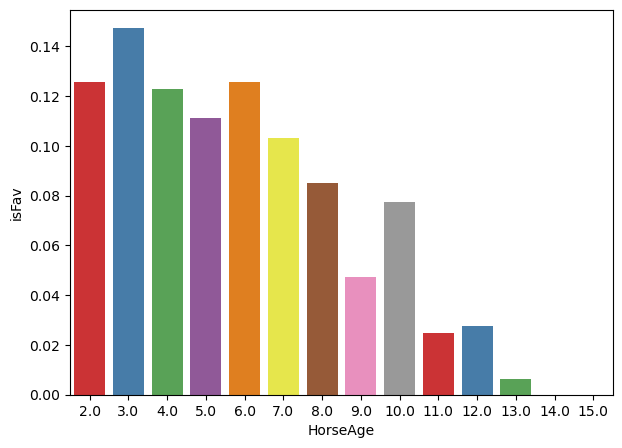

In [9]:
#barplot

plt.figure(figsize=(7,5))
sns.color_palette("Set1", as_cmap = True)
sns.barplot(df,x="HorseAge",y="isFav",palette="Set1",errorbar=None)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14328\659399582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x="HorseAge",y="RPR",palette="Set1",errorbar=None)


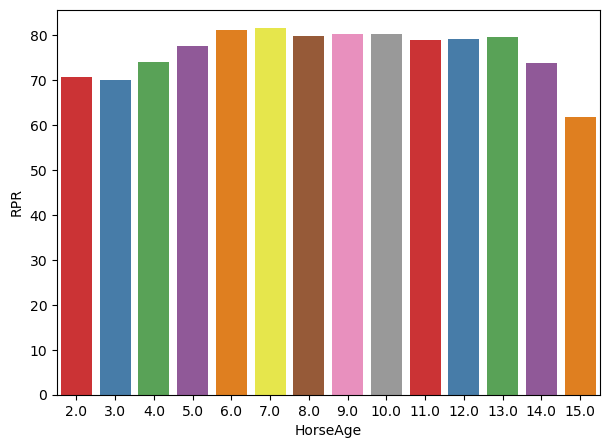

In [11]:
plt.figure(figsize=(7,5))
sns.color_palette("Set1", as_cmap = True)
sns.barplot(df,x="HorseAge",y="RPR",palette="Set1",errorbar=None)    
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12272\2082263381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x="HorseAge",y="OR",palette="Set1",errorbar=None)


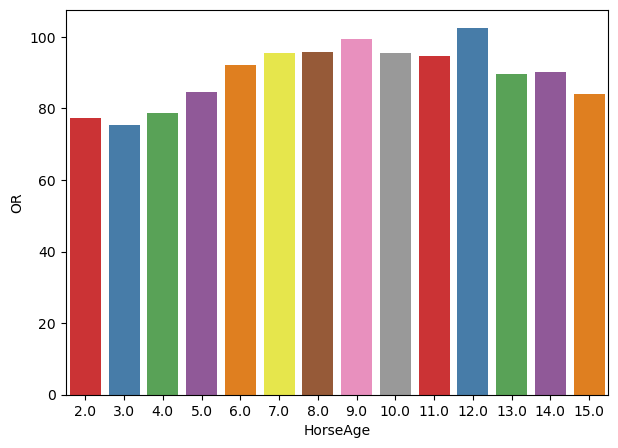

In [276]:
plt.figure(figsize=(7,5))
sns.color_palette("Set1", as_cmap = True)
sns.barplot(df,x="HorseAge",y="OR",palette="Set1",errorbar=None)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3238665732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x="res_win",y="ages",palette="Set1",errorbar=None)


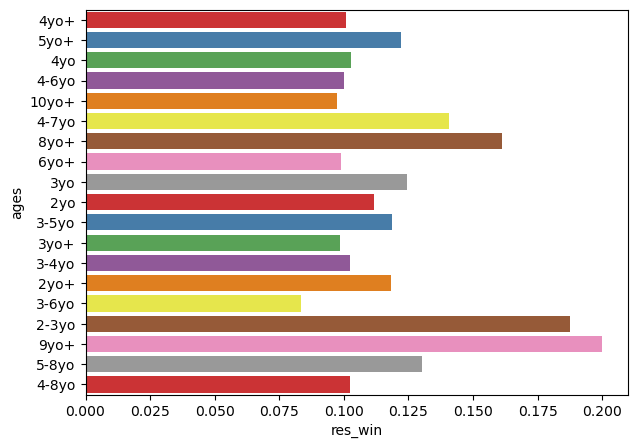

In [126]:
plt.figure(figsize=(7,5))
sns.color_palette("Set1", as_cmap = True)
sns.barplot(df,x="res_win",y="ages",palette="Set1",errorbar=None)    
plt.show()

In [49]:
df["condition_x"].value_counts()

condition_x
Good            85435
Soft            61161
Good To Soft    39163
Good To Firm    33165
Heavy           24730
Firm             2950
Slow             2328
Name: count, dtype: int64

In [98]:
age=df[['ages','AgeEligible']].groupby(['AgeEligible','ages']).size().reset_index(name="count")
data = age.groupby('AgeEligible')['count'].sum().reset_index()

In [104]:
data

,AgeEligible,count
0,2,30757
1,3,105676
2,4,96895
3,5,14610
4,6,455
5,8,31
6,9,45
7,10,463


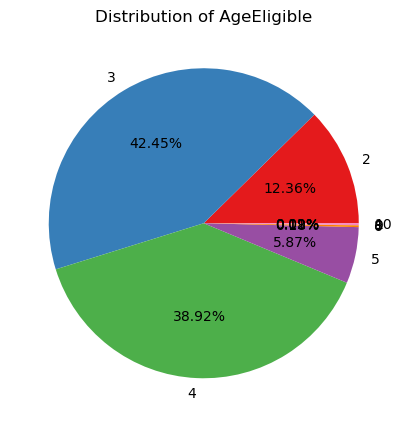

In [118]:
#pie chart

plt.figure(figsize=(5,7))
plt.pie(
    data["count"],
    labels=data["AgeEligible"],
    autopct="%1.2f%%",
    #startangle=90,
    colors=sns.color_palette("Set1", len(data))
)
plt.title("Distribution of AgeEligible")
plt.show()

In [128]:
#barplot fot categorical columns

def plot(col):
    plt.figure(figsize=(5,7))
    plt.xticks(rotation=90)
    data=df[col].value_counts().reset_index()
    print(data.head(5))
    data.columns=[col,"count"]
    sns.color_palette("Set1")
    sns.barplot(data,x=col,y="count",palette="Set1")
    plt.title(f"Distribution of {col}")
    plt.show()

In [130]:
cat_col=df.select_dtypes(include="object").columns

      horseName_x  count
0       Inspireus    598
1     Hard Knocks    437
2  Frankie Ballou    422
3       Sir Titan    420
4      Clog Maker    412


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


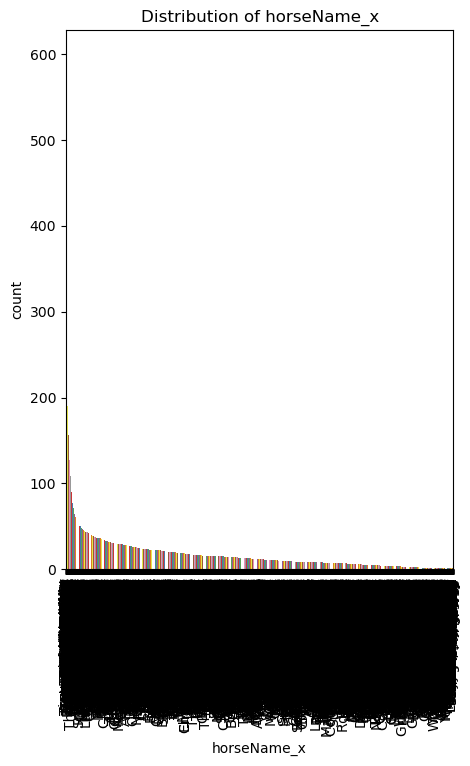

        father  count
0   Dark Angel   4686
1       Kodiac   4107
2    Dandy Man   2689
3      Getaway   2523
4  Acclamation   2511


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


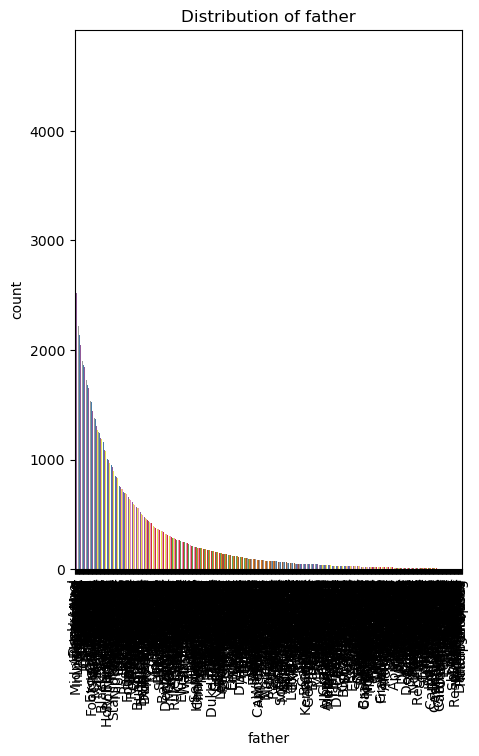

      course  count
0  Newmarket  18629
1  Doncaster  15729
2        Ayr  13061
3  Lingfield  12333
4     Redcar   9937


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


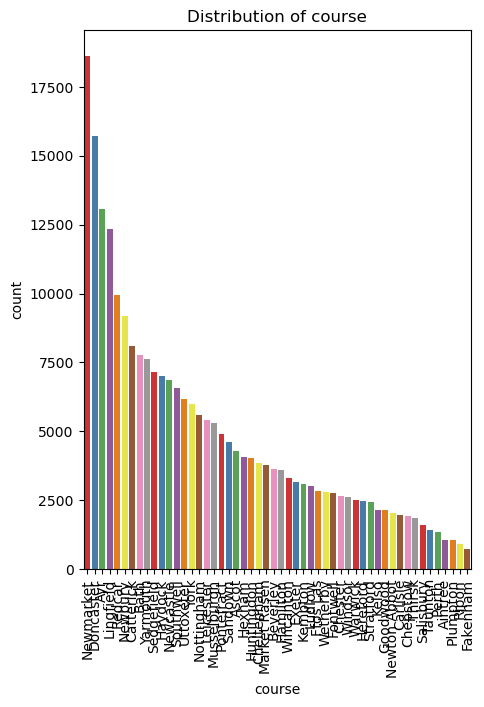

       time  count
0  02:40:00   5889
1  04:10:00   5433
2  03:00:00   5297
3  03:50:00   5258
4  03:45:00   5122


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


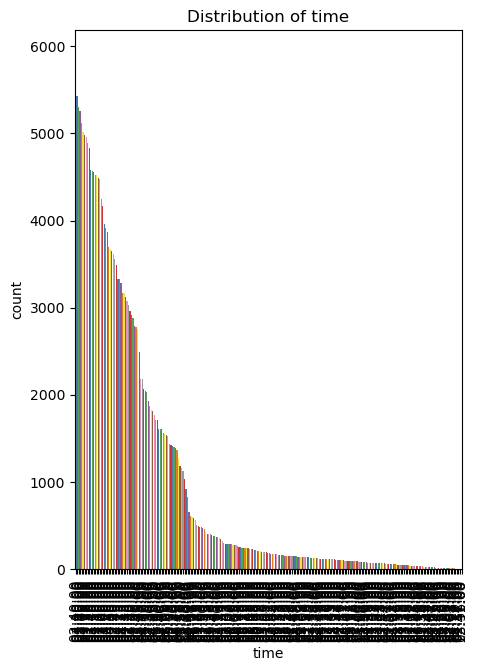

                                          title_x  count
0                                 Betway Handicap   2171
1              Heed Your Hunch At Betway Handicap   1807
2  Read Andrew Balding On Betway Insider Handicap   1753
3              Sky Sports Racing Sky 415 Handicap   1602
4      Free Tips Daily On attheraces.com Handicap   1231


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


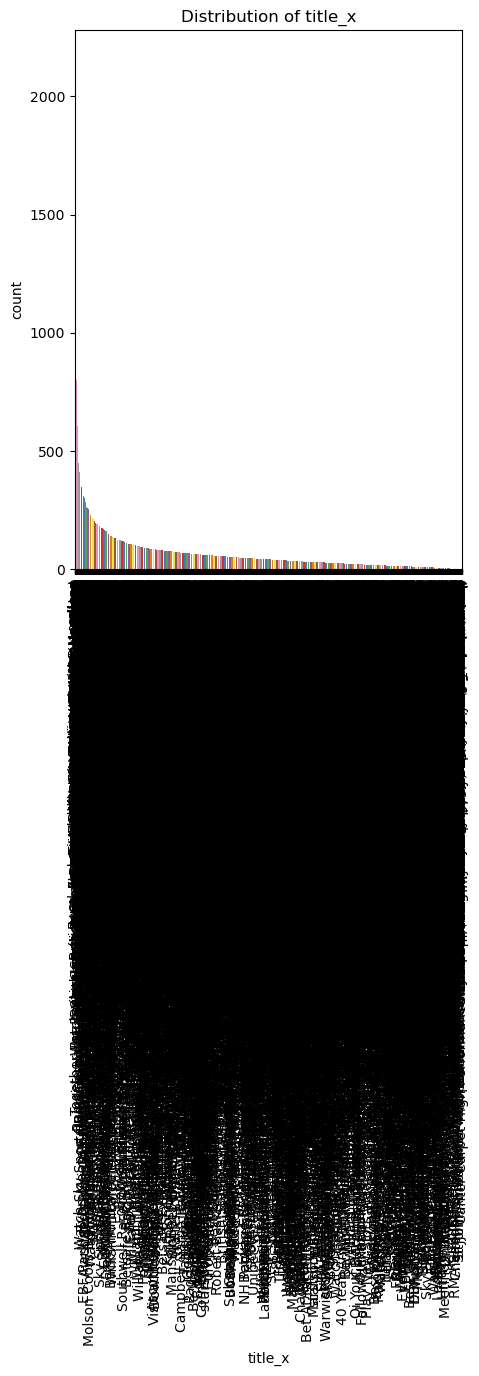

   ages  count
0  4yo+  87904
1  3yo+  84759
2   2yo  30649
3   3yo  19286
4  5yo+  14564


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


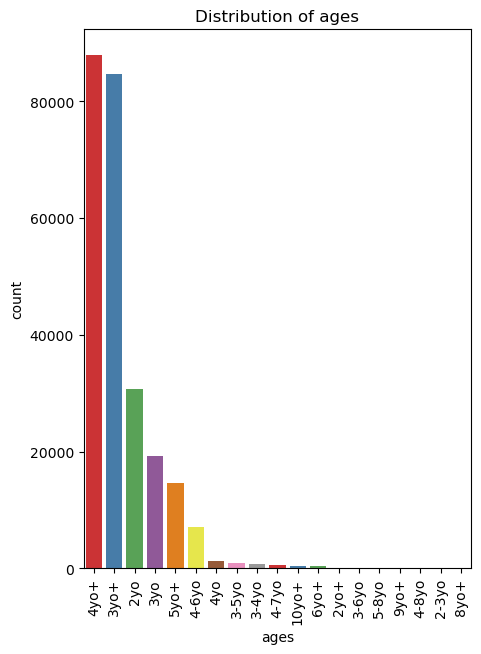

    condition_x  count
0          Good  85435
1          Soft  61161
2  Good To Soft  39163
3  Good To Firm  33165
4         Heavy  24730


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


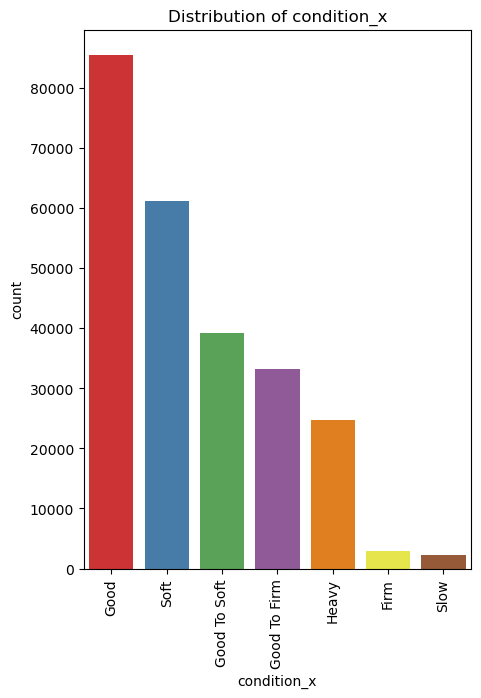

                                              prizes  count
0                  [3493.26, 1039.5, 519.48, 259.74]  20201
1                 [4690.02, 1395.62, 697.45, 348.73]  14555
2                  [2781.67, 827.75, 413.66, 206.83]  14318
3  [3428.57, 1020.25, 509.86, 300.0, 300.0, 300.0...   8242
4  [2794.14, 820.44, 410.22, 350.0, 350.0, 350.0,...   8084


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


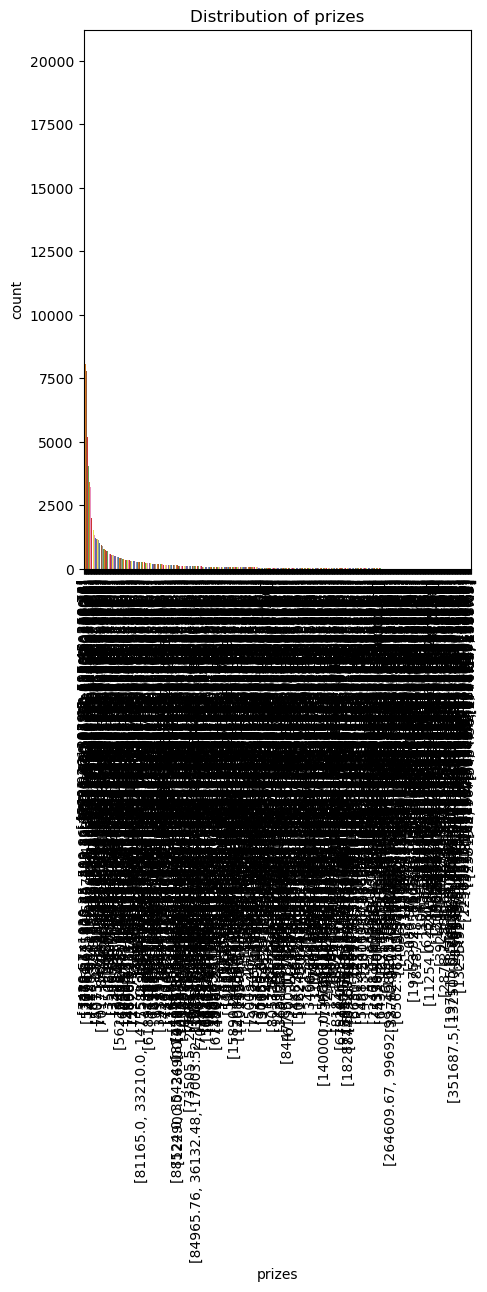

  countryCode_x   count
0            GB  248932


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


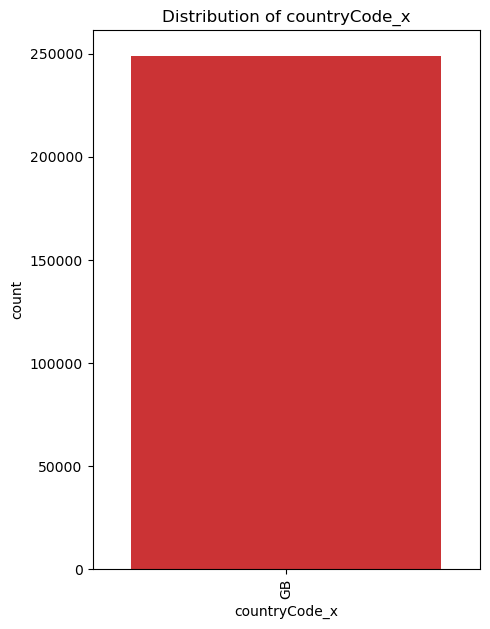

   meters   count
0    long  123029
1  medium   75744
2   short   50159


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


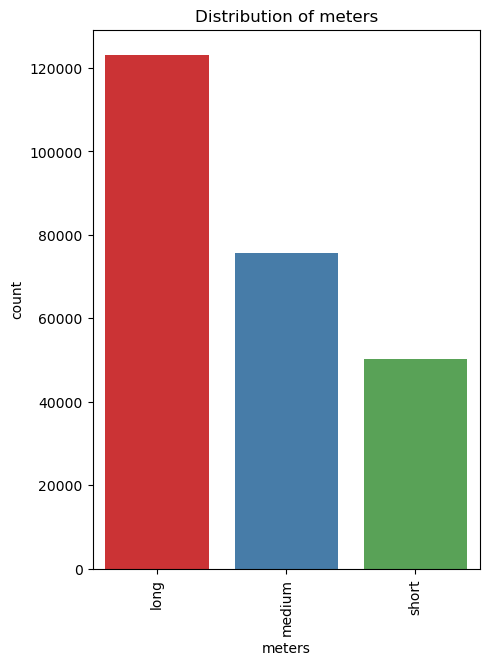

                  marketTime  count
0  2020-10-09 16:50:00+01:00   1261
1  2020-10-23 14:50:00+01:00   1257
2  2020-10-12 16:40:00+01:00   1153
3  2020-10-23 13:00:00+01:00   1120
4  2020-11-07 15:45:00+00:00   1034


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


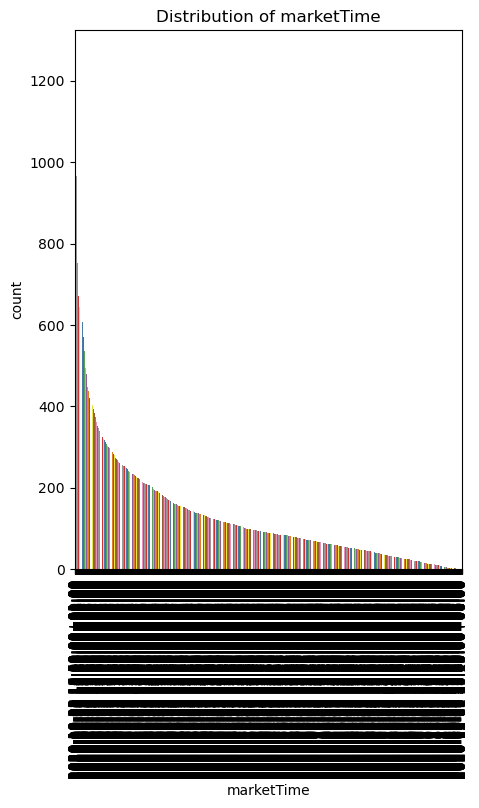

    rclass  count
0  Class 4  83059
1  Class 5  73010
2  Class 3  32984
3  Class 2  23229
4  Class 6  23063


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


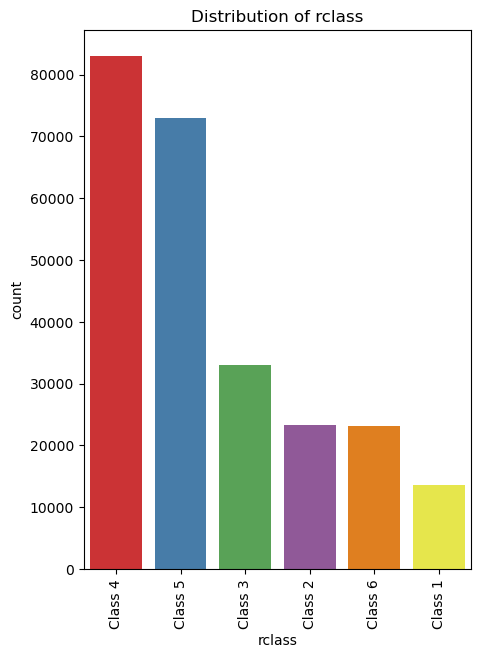

      trainerName  count
0   Richard Fahey   7305
1    Tim Easterby   6168
2  Richard Hannon   4805
3   Mark Johnston   4583
4   David O'Meara   3855


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


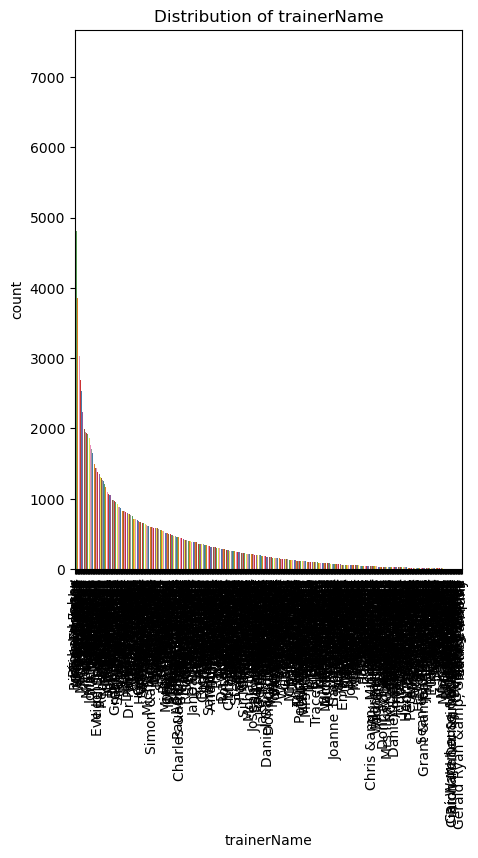

      jockeyName  count
0    Kevin Stott   4311
1   Tom Marquand   3999
2     Ben Curtis   3773
3  William Buick   3719
4   Oisin Murphy   3371


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


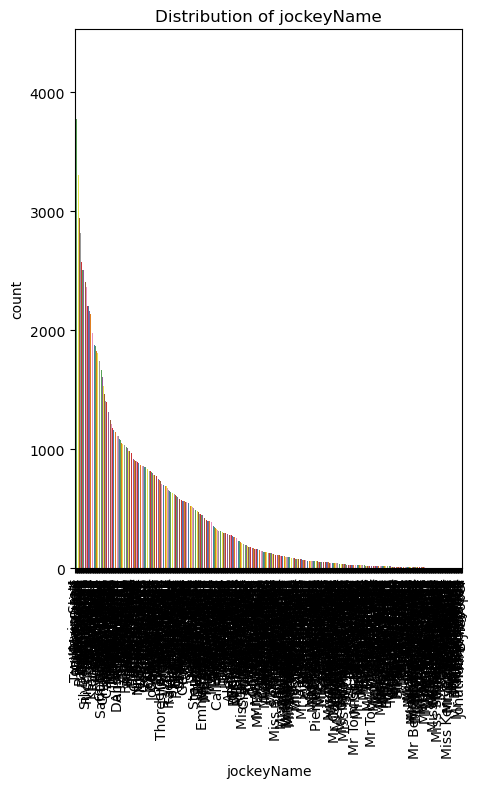

  TimeSession   count
0       Night  192209
1     Morning   38359
2   Afternoon   18364


C:\Users\admin\AppData\Local\Temp\ipykernel_5864\3106548886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x=col,y="count",palette="Set1")


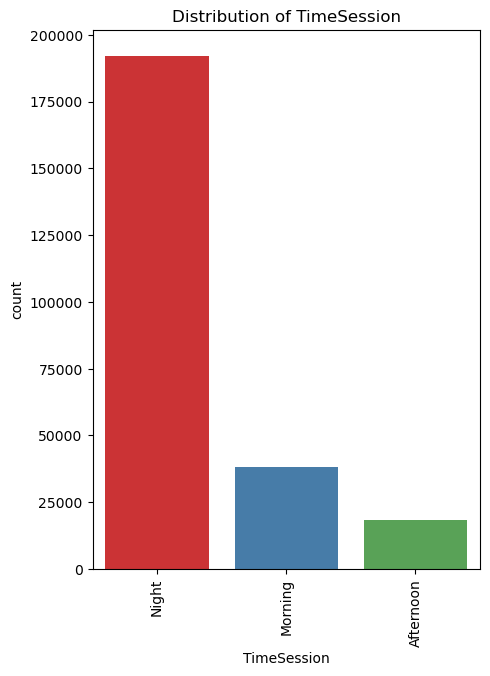

In [132]:
for i in cat_col:
    plot(i)

In [134]:
df.columns

Index(['rid', 'horseName_x', 'HorseAge', 'isFav', 'position', 'positionL',
       'dist', 'weightSt_x', 'weightLb_x', 'RPR', 'OR', 'father', 'runners_x',
       'weight', 'res_win', 'res_place', 'course', 'time', 'title_x', 'ages',
       'condition_x', 'prizes', 'winningTime', 'prize_x', 'metric',
       'countryCode_x', 'ncond', 'class', 'AgeEligible', 'dist_furlong',
       'meters', 'marketTime', 'rclass', 'trainerName', 'jockeyName', 'RPRc',
       'TRc', 'weightSt_y', 'weightLb_y', 'TimeSession', 'PreOdds', 'Odds'],
      dtype='object')

In [170]:
def age_group(age):
    if  2 >= age <= 4:
        return "Young"
    elif 5 >= age <= 8 :
        return "Prime"
    else:
        return "Seniors"

df["AgeGroup"] = df["HorseAge"].apply(age_group)        

In [174]:
df[["AgeGroup","meters"]].groupby(["AgeGroup"]).value_counts().reset_index()

,AgeGroup,meters,count
0,Prime,medium,49676
1,Prime,long,43297
2,Prime,short,25246
3,Seniors,long,79732
4,Seniors,medium,10819
5,Seniors,short,9499
6,Young,short,15414
7,Young,medium,15249
